In [1]:
import numpy as np #linear algebra
import pandas as pd #data processing
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')

In [3]:
df = df.iloc[:,2:]

In [4]:
df.sample(5)

,Age,EstimatedSalary,Purchased
118,40,59000,0
271,59,76000,1
346,53,72000,1
302,37,137000,1
183,33,43000,0


TRAIN TEST SPLIT

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1),
                                                    df['Purchased'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((280, 2), (120, 2))

StandardScaler

In [6]:
from sklearn.preprocessing import StandardScaler

# Temporarily drop non-numeric columns for scaling
X_train_numeric = X_train.select_dtypes(include=['int64', 'float64'])
X_test_numeric = X_test.select_dtypes(include=['int64', 'float64'])

scaler = StandardScaler()

# Fit the scaler to the train set
scaler.fit(X_train_numeric)

# Transform train and test sets
X_train_scaled = scaler.transform(X_train_numeric)
X_test_scaled = scaler.transform(X_test_numeric)

In [7]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [8]:
X_train_numeric

,Age,EstimatedSalary
92,26,15000
223,60,102000
234,38,112000
232,40,107000
377,42,53000
...,...,...
323,48,30000
192,29,43000
117,36,52000
47,27,54000


In [ ]:
X_train_scaled

array([[ 1.67118864e+00, -1.16317240e+00, -1.58497030e+00],
       [-1.38839503e+00,  2.17018137e+00,  9.30986724e-01],
       [-1.02465642e+00,  1.33054037e-02,  1.22017719e+00],
       [ 1.71776734e+00,  2.09385037e-01,  1.07558195e+00],
       [ 1.53516184e+00,  4.05464670e-01, -4.86046541e-01],
       [-1.05683679e+00, -2.80814046e-01, -3.12532264e-01],
       [ 3.23874887e-01,  9.93703570e-01, -8.33075096e-01],
       [ 1.46554862e+00,  9.93703570e-01,  1.85639620e+00],
       [ 1.53940914e+00,  1.33054037e-02,  1.24909623e+00],
       [ 1.38792217e+00, -8.69052946e-01,  2.26126285e+00],
       [-1.71742331e-01, -1.16317240e+00, -1.58497030e+00],
       [-7.91253235e-01,  2.17018137e+00, -8.04156050e-01],
       [-1.70199146e-01, -1.35925203e+00, -1.46929411e+00],
       [ 1.38112224e-01,  4.05464670e-01,  2.29018190e+00],
       [-3.55452132e-01,  7.97623937e-01,  7.57472446e-01],
       [-1.39831955e+00, -9.67092763e-01, -3.12532264e-01],
       [-9.79663379e-01,  1.11345220e-01

In [10]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns= X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns= X_test.columns)

In [13]:
X_train_scaled

,Age,EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047
...,...,...
275,0.993704,-1.151185
276,-0.869053,-0.775237
277,-0.182774,-0.514966
278,-1.065133,-0.457127


In [17]:
np.round(X_train.describe(),1) #original dataset

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [18]:
np.round(X_train_scaled.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


Effect of Scaling

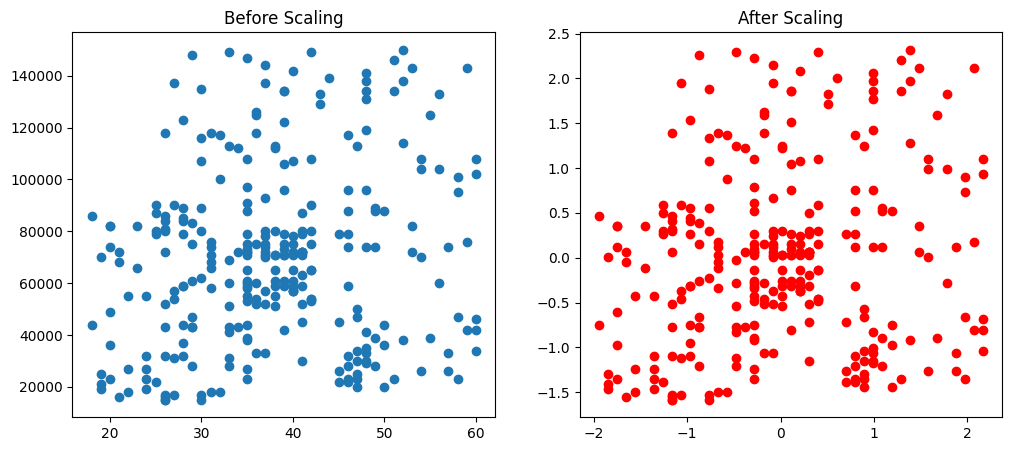

In [20]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,5))

#before scaling
ax1.scatter(X_train['Age'],X_train['EstimatedSalary'])
ax1.set_title('Before Scaling')
#after scaling
ax2.scatter(X_train_scaled['Age'],X_train_scaled['EstimatedSalary'],color="red")
ax2.set_title('After Scaling')
plt.show()

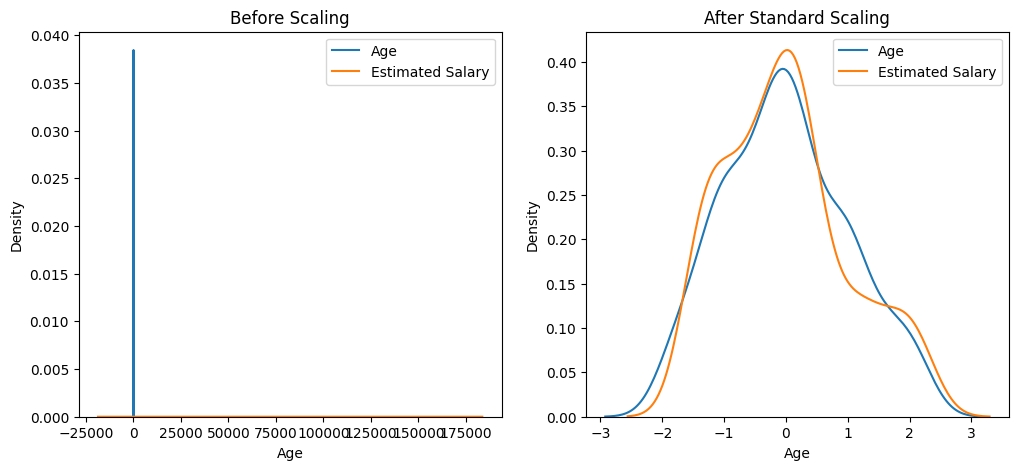

In [28]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,5))

#before scaling
ax1.set_title("Before Scaling")
sns.kdeplot(X_train['Age'],ax=ax1,label='Age')
sns.kdeplot(X_train['EstimatedSalary'],ax=ax1,label="Estimated Salary")
ax1.legend()

#After Scaling
ax2.set_title("After Standard Scaling")
sns.kdeplot(X_train_scaled['Age'],ax=ax2,label='Age')
sns.kdeplot(X_train_scaled['EstimatedSalary'],ax=ax2,label="Estimated Salary")
ax2.legend()
plt.show()

Why Scaling is important?

In [29]:
from sklearn.linear_model import LogisticRegression

In [32]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [36]:
lr.fit(X_train,y_train)
lr_scaled.fit(X_train_scaled,y_train)

LogisticRegression()

In [37]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [38]:
from sklearn.metrics import accuracy_score

In [39]:
print("ACTUAL",accuracy_score(y_test,y_pred))
print("ScCALED",accuracy_score(y_test,y_pred_scaled))

ACTUAL 0.6583333333333333
ScCALED 0.8666666666666667


In [40]:
from sklearn.tree import DecisionTreeClassifier

In [42]:
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

In [43]:
dt.fit(X_train,y_train)
dt_scaled.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

In [45]:
y_pred = dt.predict(X_test)
y_pred_scaler = dt_scaled.predict(X_test_scaled)

In [46]:
print("ACTUAL",accuracy_score(y_test,y_pred))
print("SCALED",accuracy_score(y_test,y_pred_scaled))

ACTUAL 0.875
SCALED 0.8666666666666667


In [47]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


Effect of Outlier

In [50]:
df = pd.concat([df, pd.DataFrame({'Age': [5, 90, 95], 'EstimatedSalary': [1000, 250000, 350000], 'Purchased': [0, 1, 1]})], ignore_index=True)

In [51]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
398,36,33000,0
399,49,36000,1
400,5,1000,0
401,90,250000,1


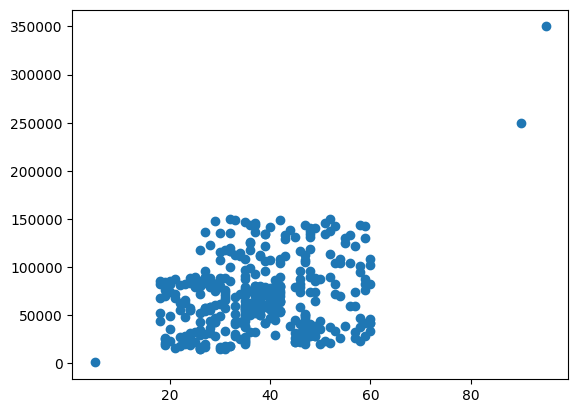

In [52]:
plt.scatter(df['Age'],df['EstimatedSalary'])

In [53]:
#from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1),
                                                    df['Purchased'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((282, 2), (121, 2))

In [54]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [62]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

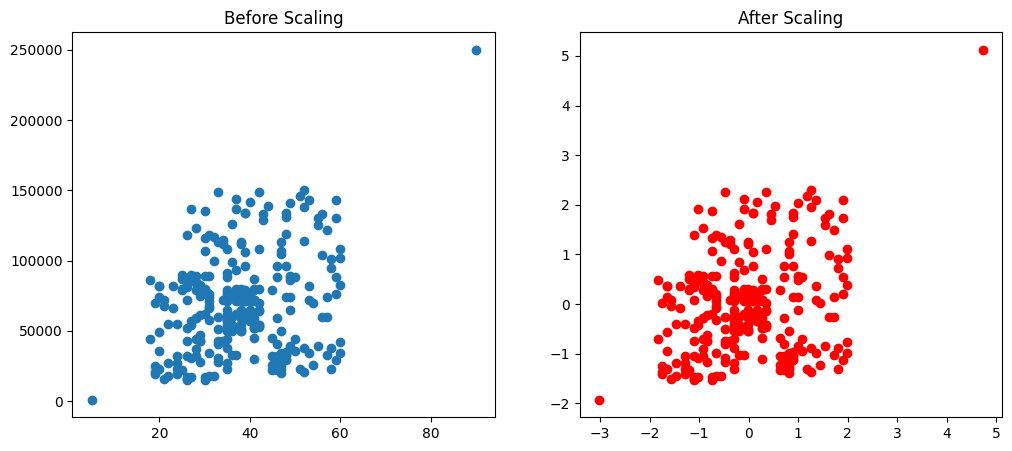

In [63]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()

In [58]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [59]:
X_train_scaled

,Age,EstimatedSalary
0,-0.652473,-0.995561
1,1.903047,2.092697
2,-0.104862,1.922701
3,-0.652473,0.562734
4,-0.013593,-0.287245
...,...,...
277,0.899092,-1.108891
278,-0.835010,-0.740567
279,-0.196130,-0.485573
280,-1.017547,-0.428908


In [60]:
np.round(X_train.describe(), 1)

,Age,EstimatedSalary
count,282.0,282.0
mean,38.1,69138.3
std,11.0,35357.7
min,5.0,1000.0
25%,30.0,43000.0
50%,37.0,68000.0
75%,46.0,86750.0
max,90.0,250000.0


In [61]:
np.round(X_train_scaled.describe(), 1)

,Age,EstimatedSalary
count,282.0,282.0
mean,0.0,0.0
std,1.0,1.0
min,-3.0,-1.9
25%,-0.7,-0.7
50%,-0.1,-0.0
75%,0.7,0.5
max,4.7,5.1
